## DECISION TREE CLASSIFIER

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.duplicated().sum()

3

In [17]:
df=df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.species=le.fit_transform(df.species)
df

C:\Users\thasl\AppData\Local\Temp\ipykernel_179312\3136758059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.species=le.fit_transform(df.species)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
y=df.species.values.reshape(-1,1)
x=df.drop('species',axis=1)

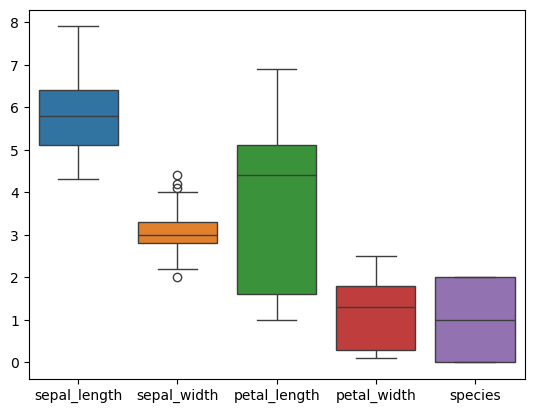

In [25]:
sns.boxplot(df)
plt.show()

In [27]:
q1=np.percentile(df.sepal_width,25,method='midpoint')
q3=np.percentile(df.sepal_width,75,method='midpoint')
iqr=q3-q1
lower_lim=q1-0.5*iqr
upper_lim=q3+0.5*iqr
df.sepal_width=df.sepal_width.clip(upper=upper_lim,lower=lower_lim)

C:\Users\thasl\AppData\Local\Temp\ipykernel_179312\1853193511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sepal_width=df.sepal_width.clip(upper=upper_lim,lower=lower_lim)


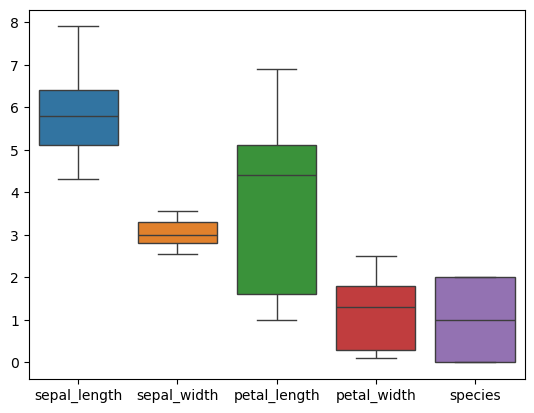

In [29]:
sns.boxplot(df)
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc=sc.fit_transform(x)

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.1,random_state=45)

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
dt_pred=dt_model.predict(x_test)
dt_pred

array([1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0])

In [39]:
from sklearn.metrics import accuracy_score
print('accuracy score :',accuracy_score(y_test,dt_pred)*100)

accuracy score : 100.0


## RANDOM FOREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)
rf_pred

C:\Users\thasl\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([1, 0, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0, 1, 2, 0])

In [44]:
print('accuracy score :',accuracy_score(y_test,rf_pred)*100)

accuracy score : 100.0
